## Рабочая директория на ShadBox:

/hse/amironov/Task4

## Импорт всех необходимых модулей

In [6]:
import numpy
import scipy.special
import scipy.misc
import npy2cube
from IPython.display import display, Image

**Вводные материалы**

Обычно волновая функция имеет комплексные значения, а для одной частицы это функция пространства и времени.
В нашем случае мы строим функцию для одноэлектронного атома.

Плотность вероятности нахождения частицы в данной точке пространства в данный момент времени считается равной квадрату абсолютного значения волновой функции этого состояния в **координатном представлении.**

Волновую функцию получают как решение уравнения Шредингера (предназначено для частиц без спина, движущихся со скоростями много меньшими скорости света).

**Зададим волновую функцию:**

В сферических координатах.

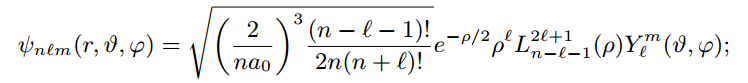

In [7]:
Image('wave func h.png')

In [3]:
def w(n,l,m,d):

    x,y,z = numpy.mgrid[-d:d:30j,-d:d:30j,-d:d:30j]
    
    # ниже происходит переход к сферическим координатам
    
    r = lambda x,y,z: numpy.sqrt(x**2+y**2+z**2) # обычное евклидово расстояние (точнее, длина вектора) в 3-х мерном пространстве
    # 2 и 3 компоненты сферических коррдинат:
    theta = lambda x,y,z: numpy.arccos(z/r(x,y,z))
    phi = lambda x,y,z: numpy.arctan(y/x)
    
    # радиус Бора. Приблизительно равен наиболее вероятному расстоянию 
    # между ядром и электроном в атоме водорода в его основном состоянии (англ. ground state).
    # Вообще, это константа и она равна 5.2917721067(12)×10^(−11) m
    a0 = 1.
    
    # По R и WF комментарии приведены ниже:
    R = lambda r,n,l: (2*r/n/a0)**l * numpy.exp(-r/n/a0) * scipy.special.genlaguerre(n-l-1,2*l+1)(2*r/n/a0)
    WF = lambda r,theta,phi,n,l,m: R(r,n,l) * scipy.special.sph_harm(m,l,phi,theta)
    
    # следующуя функция вообще в конечном итоге не используется, 
    # однако именно она является плотностью вероятности нахождения частицы в данной точке пространства в данный момент времени
    absWF = lambda r,theta,phi,n,l,m: numpy.absolute(WF(r,theta,phi,n,l,m))**2

    return WF(r(x,y,z),theta(x,y,z),phi(x,y,z),n,l,m)

**Комментарии**

In [ ]:
R = lambda r,n,l: (2*r/n/a0)**l * numpy.exp(-r/n/a0) * scipy.special.genlaguerre(n-l-1,2*l+1)(2*r/n/a0)

Это отражает следующую часть формулы (включает обобщённый полином Лагерра степени n-l-1):

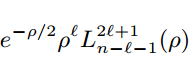

In [8]:
Image('wave func h 1.png')

In [ ]:
WF = lambda r,theta,phi,n,l,m: R(r,n,l) * scipy.special.sph_harm(m,l,phi,theta)

Это отражает следующую часть формулы (включает сферическую гармонику):

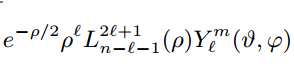

In [9]:
Image('wave func h 2.png')

In [ ]:
Следующая компонента в расчете функции по каким-то причинам не учитывается:

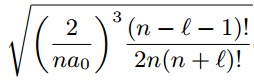

In [11]:
Image('wave func h 3.png')

**С учетом всех комментариев поправим нашу волновую функцию**

В качестве вывода будем использовать ее квадрат, чтобы перейти к плотности и использовать это для изображений.

In [13]:
def w(n,l,m,d):

    x,y,z = numpy.mgrid[-d:d:30j,-d:d:30j,-d:d:30j]
    
    r = lambda x,y,z: numpy.sqrt(x**2+y**2+z**2)
    theta = lambda x,y,z: numpy.arccos(z/r(x,y,z))
    phi = lambda x,y,z: numpy.arctan(y/x)
    
    a0 = 5.29*10**(-11)
    
    R = lambda r,n,l: (scipy.misc.factorial(n-l-1) / (2*n*scipy.misc.factorial(n+l)))**0.5*(2*r/n/a0)**l * numpy.exp(-r/n/a0) * scipy.special.genlaguerre(n-l-1,2*l+1)(2*r/n/a0)
    WF = lambda r,theta,phi,n,l,m: R(r,n,l) * scipy.special.sph_harm(m,l,phi,theta)
    
    absWF = lambda r,theta,phi,n,l,m: numpy.absolute(WF(r,theta,phi,n,l,m))**2

    return absWF(r(x,y,z),theta(x,y,z),phi(x,y,z),n,l,m)

**Рассчитаем значения для первых трех уровней. Функция w выдает трехмерный массив из 30 x 30 x 30 элементов с неким шагом (или grid).**

In [14]:
d = 30
step = float(2.*d/29)

# Зададим цикл по перебору квантовых чисел

for n in range(0,4):
    for l in range(0,n):
        for m in range(0,l+1,1):
            grid= w(n,l,m,d) 
            name='%s-%s-%s' % (n,l,m)
            # для сохранения нужно задать координаты старта grid и шаг по каждому направлению
            npy2cube.npy2cube(grid,(-d,-d,-d),(step,step,step),name+'.cube')

**Сохраняем полученные файлы .cube к себе и пытаемся открыть в локальном PyMol**

-> неудача, "sorry, VMD Molfile Plugins not compiled into this build"

**Пытаемся визуализировать с помощью ipyvolume**

In [31]:
import ipyvolume as ipv

In [34]:
d = 30
step = float(2.*d/29)
names = list()

for n in range(0,4):
    for l in range(0,n):
        for m in range(0,l+1,1):
            grid= w(n,l,m,d) 
            name='%s-%s-%s' % (n,l,m)
            names.append(name)
            ipv.pylab.volshow(grid, level = 0, opacity = 0.015, downscale = 1, level_width = 0.2, ambient_coefficient = 10)
            ipv.pylab.savefig('/home/shad/hse/amironov/Task4/'+name+'.png', ipv.pylab.gcf())

Output()

ValueError: Can't clean for JSON: Figure(ambient_coefficient=10.0, camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], style={'box': {'visible': True}, 'axes': {'color': 'black', 'visible': True, 'ticklabel': {'color': 'black'}, 'label': {'color': 'black'}}, 'background-color': 'white'}, tf=TransferFunctionWidgetJs3(level1=0.0, level2=0.0, level3=0.0, opacity1=0.015, opacity2=0.0, opacity3=0.0, width1=0.2, width2=0.0, width3=0.0), volume_data=array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]), width=400, xlim=[0.0, 1.0], ylim=[0.0, 1.0], zlim=[0.0, 1.0])

In [35]:
ipv.pylab.volshow(grid)

Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], style={'box': {'visible': True}, 'axes': {'color': 'black', 'visible': True, 'ticklabel': {'color': 'black'}, 'label': {'color': 'black'}}, 'background-color': 'white'}, tf=TransferFunctionWidgetJs3(level1=0.0, level2=0.0, level3=0.0, opacity1=0.015, opacity2=0.0, opacity3=0.0, width1=0.2, width2=0.0, width3=0.0), volume_data=array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]), width=400, xlim=[0.0, 1.0], ylim=[0.0, 1.0], zlim=[0.0, 1.0])

-> Ничего не отражается, возможно, не работает именно на shadbox

-> Установим новую версию PyMol 2.0 локально (educational version)

Пробуем визуализировать и видим следующее:

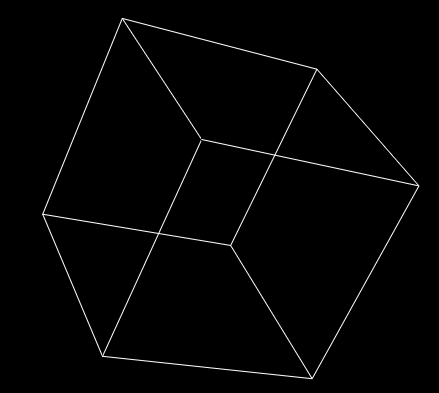

In [36]:
Image('cube 2-0-0.png')

По-видимому, был неправильно выбран масштаб.

In [44]:
def w(n,l,m,d):

    x,y,z = numpy.mgrid[-d:d:30j,-d:d:30j,-d:d:30j]
    
    r = lambda x,y,z: numpy.sqrt(x**2+y**2+z**2)
    theta = lambda x,y,z: numpy.arccos(z/r(x,y,z))
    phi = lambda x,y,z: numpy.arctan(y/x)
    
    a0 = 1
    
    R = lambda r,n,l: (scipy.misc.factorial(n-l-1) / (2*n*scipy.misc.factorial(n+l)))**0.5*(2*r/n/a0)**l * numpy.exp(-r/n/a0) * scipy.special.genlaguerre(n-l-1,2*l+1)(2*r/n/a0)
    WF = lambda r,theta,phi,n,l,m: R(r,n,l) * scipy.special.sph_harm(m,l,phi,theta)
    
    absWF = lambda r,theta,phi,n,l,m: numpy.absolute(WF(r,theta,phi,n,l,m))**2

    return absWF(r(x,y,z),theta(x,y,z),phi(x,y,z),n,l,m)

In [45]:
d = 30
step = float(2.*d/29)

# Зададим цикл по перебору квантовых чисел

for n in range(0,4):
    for l in range(0,n):
        for m in range(0,l+1,1):
            grid= w(n,l,m,d) 
            name='%s-%s-%s' % (n,l,m)
            # для сохранения нужно задать координаты старта grid и шаг по каждому направлению
            npy2cube.npy2cube(grid,(-d,-d,-d),(step,step,step),name+'.cube')

-> Теперь файлы cube стали значительно больше весить. Видимо, масштаб был выбран верно

**ОЧЕНЬ ВАЖНО:** в Windows, чтобы запускать Educational version из коммандной строки, надо вручную добавить директорию с установленным PyMol в переменную PATH. В режиме RPC запускаем командой **pymolwin -R**

**НО ОКАЗАЛОСЬ, что:**

Ray tracing is not supported in Educational-Use-Only PyMOL.

**и потому картинки в PyMol не получить...**

**В результате, визуализация не работает ни в PyMol, ни в ipyvolume**

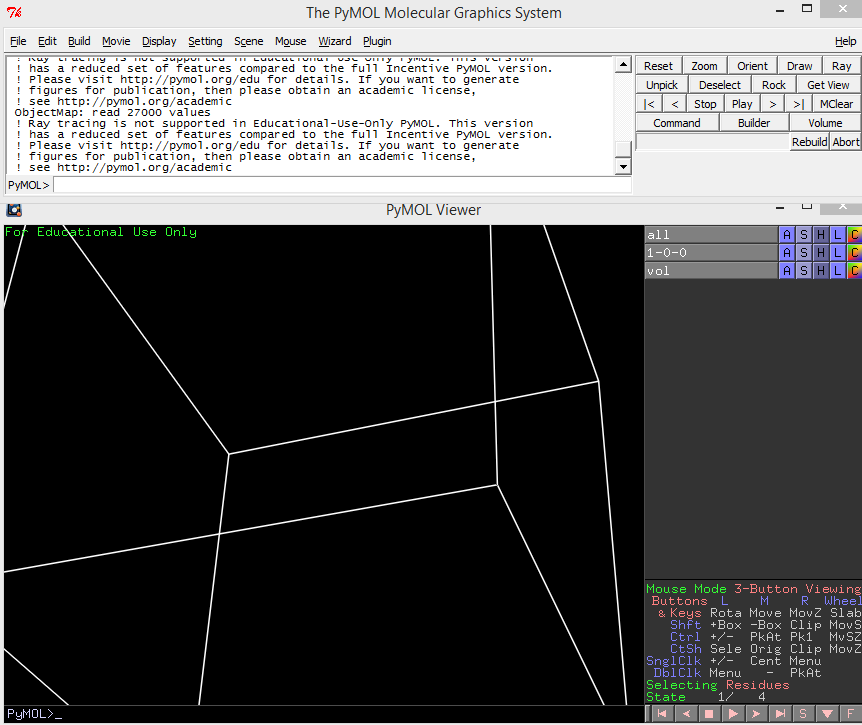

In [46]:
Image('pymol educ.png')